
Trabalho Avaliativo AV2 - Árvores Binárias e Balanceamento

Aluno: Arthur

Data de entrega: 29/11/2025


Implementação de Árvore 2-3-4 (B-tree de ordem 4) em Python
Operações: Inserção com balanceamento automático, busca, percurso em-ordem
Regras: todos os nós podem ter 1, 2 ou 3 chaves; folhas no mesmo nível


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
class Node234:
    def __init__(self, keys=None, children=None, leaf=True):
        self.keys = keys if keys is not None else []
        self.children = children if children is not None else []
        self.leaf = leaf

    def is_full(self):
        return len(self.keys) == 3

    def __str__(self):
        return f"Node(keys={self.keys}, leaf={self.leaf})"

In [2]:
class Tree234:
    def __init__(self):
        self.root = Node234()

    def search(self, key, node=None):
        if node is None:
            node = self.root
        i = 0
        while i < len(node.keys) and key > node.keys[i]:
            i += 1
        if i < len(node.keys) and key == node.keys[i]:
            return node, i
        elif node.leaf:
            return None
        else:
            return self.search(key, node.children[i])

    def split_child(self, parent, child_index):
        child = parent.children[child_index]
        assert child.is_full(), "split_child deve receber um nó cheio"
        k0, k1, k2 = child.keys
        left = Node234(keys=[k0], leaf=child.leaf)
        right = Node234(keys=[k2], leaf=child.leaf)
        if not child.leaf:
            left.children = child.children[:2]
            right.children = child.children[2:]
            left.leaf = False
            right.leaf = False
        parent.keys.insert(child_index, k1)
        parent.children[child_index] = left
        parent.children.insert(child_index + 1, right)
        parent.leaf = False

    def insert(self, key):
        if self.search(key) is not None:
            return
        root = self.root
        if root.is_full():
            new_root = Node234(keys=[], children=[root], leaf=False)
            self.split_child(new_root, 0)
            self.root = new_root
        self._insert_non_full(self.root, key)

    def _insert_non_full(self, node, key):
        i = len(node.keys) - 1
        if node.leaf:
            node.keys.append(key)
            node.keys.sort()
            return
        while i >= 0 and key < node.keys[i]:
            i -= 1
        child_index = i + 1
        if node.children[child_index].is_full():
            self.split_child(node, child_index)
            if key > node.keys[child_index]:
                child_index += 1
        self._insert_non_full(node.children[child_index], key)

    def inorder(self, node=None, out=None):
        if out is None:
            out = []
        if node is None:
            node = self.root
        if node.leaf:
            out.extend(node.keys)
            return out
        for i, key in enumerate(node.keys):
            self.inorder(node.children[i], out)
            out.append(key)
        self.inorder(node.children[len(node.keys)], out)
        return out

    def height(self):
        h = 0
        node = self.root
        while True:
            h += 1
            if node.leaf:
                break
            node = node.children[0]
        return h

    def print_structure(self, node=None, level=0):
        if node is None:
            node = self.root
        indent = "  " * level
        print(f"{indent}- Nível {level+1}: {node.keys} {'(folha)' if node.leaf else ''}")
        if not node.leaf:
            for child in node.children:
                self.print_structure(child, level + 1)

In [3]:
# Criar árvore 2-3-4
t234 = Tree234()

# Inserir 21 valores
valores = [10, 20, 30, 15, 25, 5, 1, 50, 60, 70, 80, 90, 100,
           110, 120, 130, 140, 150, 160, 170, 180, 190]

for v in valores:
    t234.insert(v)

# Resultados
print("In-order (chaves em ordem crescente):")
print(t234.inorder())

print("\nAltura da árvore 2-3-4:")
print(t234.height())

print("\nEstrutura por níveis:")
t234.print_structure()

In-order (chaves em ordem crescente):
[1, 5, 10, 15, 20, 25, 30, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]

Altura da árvore 2-3-4:
4

Estrutura por níveis:
- Nível 1: [60] 
  - Nível 2: [20] 
    - Nível 3: [10] 
      - Nível 4: [1, 5] (folha)
      - Nível 4: [15] (folha)
    - Nível 3: [30] 
      - Nível 4: [25] (folha)
      - Nível 4: [50] (folha)
  - Nível 2: [100, 140] 
    - Nível 3: [80] 
      - Nível 4: [70] (folha)
      - Nível 4: [90] (folha)
    - Nível 3: [120] 
      - Nível 4: [110] (folha)
      - Nível 4: [130] (folha)
    - Nível 3: [160] 
      - Nível 4: [150] (folha)
      - Nível 4: [170, 180, 190] (folha)


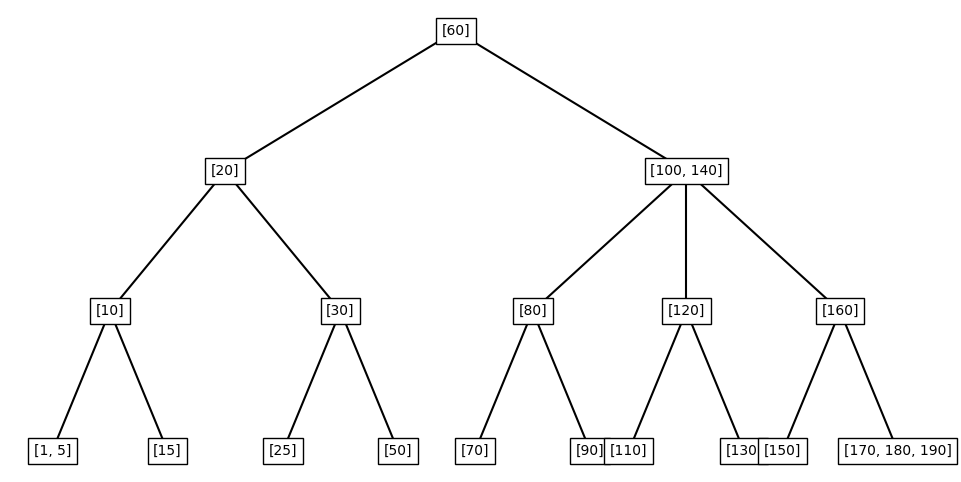

In [8]:
import matplotlib.pyplot as plt

def desenhar_arvore_234(node, x=0, y=0, dx=10, dy=10, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,6))
    
    # Desenha o nó
    ax.text(x, y, str(node.keys), ha='center', va='center',
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # Desenha filhos
    if node.children:
        step = dx / len(node.children)
        start_x = x - dx/2
        for i, child in enumerate(node.children):
            child_x = start_x + i*step + step/2
            child_y = y - dy
            ax.plot([x, child_x], [y, child_y], 'k-')
            desenhar_arvore_234(child, child_x, child_y, dx/2, dy, ax)
    
    return ax

# Mostrar árvore
ax = desenhar_arvore_234(t234.root)
plt.axis('off')
plt.show()